<a href="https://colab.research.google.com/github/ounospanas/AIDL_A_02/blob/main/notebooks/AIDL_A02_network_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


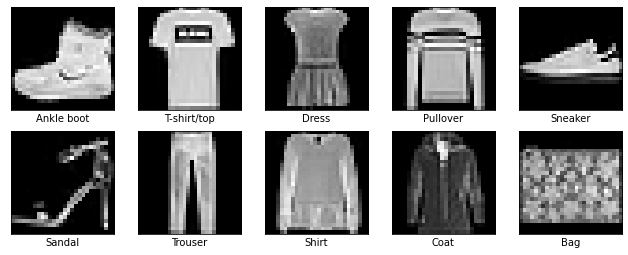

In [ ]:
#visualize some data
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
selected = [0,1,3,5,6,8,16,18,19,23]
plt.figure(figsize=(11, 11))
for i, s in enumerate(selected):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #img = plt.imread(x_train[s])
    plt.imshow(x_train[s], cmap='gray')
    plt.xlabel(classes[y_train[s]],)

In [3]:
# normalize data
x_train = x_train.reshape(x_train.shape[0],-1)/255
x_test = x_test.reshape(x_test.shape[0],-1)/255

# Binary Classification

In [ ]:
# select only t-shirts and ankle boots
shirt_train = np.where(y_train==0)
dress_train = np.where(y_train==3)

shirt_test = np.where(y_test==0)
dress_test = np.where(y_test==3)

In [ ]:
# concatenate them
x_train_s = x_train[shirt_train]
y_train_s = y_train[shirt_train]

x_test_s = x_test[shirt_test]
y_test_s = y_test[shirt_test]

x_train_d = x_train[dress_train]
y_train_d = y_train[dress_train]

x_test_d = x_test[dress_test]
y_test_d = y_test[dress_test]

x_train_binary = np.concatenate([x_train_s, x_train_d])
x_test_binary = np.concatenate([x_test_s, x_test_d])

y_train_binary = np.concatenate([y_train_s, np.ones_like(y_train_d)])
y_test_binary = np.concatenate([y_test_s, np.ones_like(y_test_d)])

# Neural Network (Custom)

Compute the sigmoid function:
$$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$

In [ ]:
def sigmoid(z):
    """
    Compute sigmoid function.
    z : the product theta.T * x + b
    Returns
    -------
    g : The sigmoid function.
    """
    a = 1./(1+np.exp(-z))

    return a

$a = ReLU(z) = max(z,0)$

In [ ]:
def relu(z):
    """
    Compute relu function.
    z : the product theta.T * x + b
    Returns
    -------
    a : The relu function.
    """
    a = np.maximum(z,0)

    return a

In [ ]:
# check relu function
assert relu(-1) == 0
assert relu(2) == 2

# Parameter Initialization

Xavier initialization: $$[-\sqrt{\frac{6}{n_{in}+n_{out}}}, \sqrt{\frac{6}{n_{in}+n_{out}}}]$$

In [ ]:
def init_params_xavier(n_in, n_out):

    # TO DO
    # set random seed to 0
    # Hint, check formula and use np.random.uniform
    np....
    w = None
    #########
    b = np.random.randn(n_out)*0.01
    return w, b

In [ ]:
# check init params
w, b  = init_params_xavier(2,3)
print(np.round(w,4) == np.array([[ 0.1069,  0.4715,  0.2251],[ 0.0983, -0.1673,  0.3196]]))
print(np.round(b,4) == np.array([0.0095, -0.0015, -0.001]))

[[ True  True  True]
 [ True  True  True]]
[ True  True  True]


He initialization: $$np.random.randn(n_{in}, n_{out})*\sqrt{\frac{2}{n_{in}}}$$, not multiply using 0.01.

In [ ]:
def init_params_he(n_in, n_out):
    # TO DO
    # set random seed to 0
    # Hint, check formula and use np.random.randn
    # for b there is no n_in inside the np.random.randn
    np...
    w = None
    b = None
    return w, b

In [ ]:
# check init params
w, b  = init_params_he(2,3)
print(np.round(w,4) == np.array([[ 1.7641,  0.4002,  0.9787], [ 2.2409,  1.8676, -0.9773]]))
print(np.round(b,4) == np.array([0.9501, -0.1514, -0.1032]))

[[ True  True  True]
 [ True  True  True]]
[ True  True  True]


Calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

In [ ]:
def costFunction(y, m, a):
    """
    Computes cost for linear regression.
    X : feature vector, shape (m x n+1)
    y : labels (i.e., dog or cat), shape (m, )
    w : parameters for the linear regression, shape (n+1, )
    m: data legth

    returns
    -------
    J : value of cost function.
    """

    J = -1/m * np.sum(y*np.log(a) + (1-y)*np.log(1-a))


    return J

In [ ]:
#forward pass
def forward(X, w, b, activation = 'relu'):
    z = np.dot(X,w) + b
    if activation=='relu':
        a = relu(z)
    else:
        a = sigmoid(z)
    return a

In [ ]:
w, b  = init_params_he(2,3)
forward(np.asarray([[1,2],[3,4]]), w, b, 'relu')[0].shape

(3,)

\begin{split}ReLU'(z)= \begin{Bmatrix}1 & z>0 \\
0 & z<0 \end{Bmatrix}\end{split}

In [ ]:
#relu gradient
def reluBackward(z):
    z[z<=0] = 0
    z[z>0] = 1
    return z

Calculate the derivatives: $$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (A^{(i)}-Y^{(i)})$$

In [ ]:
#backpropagation
def backward(a, dz):
    m = len(a)
    dw = np.dot(a.T, dz) / m
    db = np.sum(dz, axis=0, keepdims=True) / m

    return dw, db

$$ w_j := w_j - \alpha dw_j $$
$$ b := b - \alpha db $$

In [ ]:
# update parameters for optimization
def update(w, b, dw, db, learning_rate=0.01):
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w, b

In [ ]:
#forward pass
def dummy_neural(X, y, n_layer_1, lr = 0.01, epochs = 100):
    parameters = {}
    gradients = {}
    costs = []

    n_in = X.shape[1]
    n_out = 1

    # initialize network with 1 hidden layer (and 1 output of course).
    # Layer 1 should have 200 neurons
    w1, b1 = None #use init_params_xavier
    w2, b2 = None #use init_params_xavier

    parameters['w1'] = w1
    parameters['b1'] = b1
    parameters['w2'] = w2
    parameters['b2'] = b2

    for i in range(epochs):

        #forward pass
        a1 = forward(X, w1, b1, activation = 'relu')
        a2 = forward(a1, w2, b2, activation = 'sigmoid')

        #cost function
        cost = costFunction(y, len(y), a2)
        costs.append(cost)

        #backward pass
        dz2 = a2-y
        dw2, db2 = backward(a2, dz2)
        dz1 = np.dot((dz2),w2.T)*reluBackward(np.dot(X,w1) + b1)
        dw1, db1 = backward(X, dz1)

        gradients['dw1'] = dw1
        gradients['db1'] = db1
        gradients['dw2'] = dw2
        gradients['db2'] = db2

        #update weights
        w2, b2 = update(w2, b2, dw2, db2, lr)
        w1, b1 = update(w1, b1, dw1, db1, lr)

        parameters['w1'] = w1
        parameters['b1'] = b1
        parameters['w2'] = w2
        parameters['b2'] = b2

        if i%10==0:

            a1t = forward(x_test_binary, w1, b1, activation = 'relu')
            a2t = forward(a1t, w2, b2, activation = 'sigmoid')

            print("epoch {} with cost {}".format(i,cost))
            print("train:", np.mean(np.round(a2)==y))
            print("test:", np.mean(np.round(a2t.reshape(-1))==y_test_binary))

    return parameters, a2, costs, gradients

In [ ]:
learning_rate = 0.1
a = dummy_neural(x_train_binary, y_train_binary.reshape(-1,1), 200, learning_rate, 1000)

epoch 0 with cost 0.73222077432145
train: 0.5068333333333334
test: 0.5
epoch 10 with cost 0.3449637483262826
train: 0.8908333333333334
test: 0.882
epoch 20 with cost 0.2831690845443682
train: 0.897
test: 0.894
epoch 30 with cost 0.2593395198965416
train: 0.9028333333333334
test: 0.9015
epoch 40 with cost 0.2452727337640431
train: 0.9095833333333333
test: 0.907
epoch 50 with cost 0.23537812157188362
train: 0.9139166666666667
test: 0.913
epoch 60 with cost 0.22785751996816328
train: 0.9176666666666666
test: 0.917
epoch 70 with cost 0.22213162272876213
train: 0.9193333333333333
test: 0.921
epoch 80 with cost 0.2175448627414139
train: 0.9216666666666666
test: 0.9225
epoch 90 with cost 0.2136466884836102
train: 0.9239166666666667
test: 0.9235
epoch 100 with cost 0.21042192808580462
train: 0.9250833333333334
test: 0.924
epoch 110 with cost 0.20771532431056403
train: 0.927
test: 0.9255
epoch 120 with cost 0.20538208768692795
train: 0.928
test: 0.9275
epoch 130 with cost 0.20328904868104014
tr

In [ ]:
# check the test accuracy
a1t = forward(x_test_binary, a[0]['w1'], a[0]['b1'], activation = 'relu')
a2t = forward(a1t, a[0]['w2'], a[0]['b2'], activation = 'sigmoid')
# if you used he
# assert np.mean(np.round(a2t.reshape(-1))==y_test_binary) == 0.9255
# if you used xavier
assert np.mean(np.round(a2t.reshape(-1))==y_test_binary) == 0.9405

# Learning rate scheduling

In [ ]:
def lr_scheduling(lr, epoch, schedule = 'step_decay'):

  if schedule=='step_decay':
    #TO DO, every 50 epochs divide lr by 2
    if ...
      lr = None
  elif schedule=='exponential_decay':
    #TO DO, multiply rl every epoch by exp(k), where k = 0.01
    k = None
    lr = None
  else:
    print('No scheduler, please define a correct scheduler!')

  return lr

In [ ]:
lr = 0.1
for i in range(200):
  lr = lr_scheduling(lr, i, schedule = 'step_decay')
assert lr==0.00625

lr = 0.1
for i in range(200):
  lr = lr_scheduling(lr, i, schedule = 'exponential_decay')
assert np.round(lr,4)==0.0135

# Dropout

In [ ]:
def dropout_forward(a, keep_prob):
    # TO DO
    dr = None                                        # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    dr = None                                         # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    a = None                                         # Step 3: shut down some neurons of A1
    a = None                                  # Step 4: Scale the value of neurons that haven't been shut down by dividing with keep_prob
    #####
    return a, dr

In [ ]:
def dropout_backward(da, dr, keep_prob):
    # TO DO
    da = None             # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    da = None             # Step 2: Scale the value of neurons that haven't been shut down by dividing with keep_prob
    ######
    return da

In [ ]:
#forward pass
def dummy_neural_dr(X, y, n_layer_1, lr = 0.01, epochs = 100, keep_prob=0.1):
    parameters = {}
    gradients = {}
    costs = []

    n_in = X.shape[1]
    n_out = 1

    # initialize network with 1 hidden layer (and 1 output of course).
    # Layer 1 should have 200 neurons
    w1, b1 = init_params_xavier(n_in, n_layer_1)
    w2, b2 = init_params_xavier(n_layer_1, n_out)

    parameters['w1'] = w1
    parameters['b1'] = b1
    parameters['w2'] = w2
    parameters['b2'] = b2

    for i in range(epochs):

        #forward pass
        a1 = forward(X, w1, b1, activation = 'relu')
        a1, dr = None # TO DO use dropout_forward
        a2 = forward(a1, w2, b2, activation = 'sigmoid')

        #cost function
        cost = costFunction(y, len(y), a2)
        costs.append(cost)

        #backward pass
        dz2 = a2-y
        dw2, db2 = backward(a2, dz2)
        da1 = np.dot((dz2),w2.T)
        da1 = None # TO DO use dropout_backward
        dz1 = da1*reluBackward(np.dot(X,w1) + b1)
        dw1, db1 = backward(X, dz1)

        gradients['dw1'] = dw1
        gradients['db1'] = db1
        gradients['dw2'] = dw2
        gradients['db2'] = db2

        #update weights
        w2, b2 = update(w2, b2, dw2, db2, lr)
        w1, b1 = update(w1, b1, dw1, db1, lr)

        parameters['w1'] = w1
        parameters['b1'] = b1
        parameters['w2'] = w2
        parameters['b2'] = b2

        if i%10==0:

            a1t = forward(x_test_binary, w1, b1, activation = 'relu')
            a2t = forward(a1t, w2, b2, activation = 'sigmoid')

            print("epoch {} with cost {}".format(i,cost))
            print("train:", np.mean(np.round(a2)==y))
            print("test:", np.mean(np.round(a2t.reshape(-1))==y_test_binary))

    return parameters, a2, costs, gradients

In [ ]:
learning_rate = 0.1
a = dummy_neural_dr(x_train_binary, y_train_binary.reshape(-1,1), 200, learning_rate, 1000, 0.2)

epoch 0 with cost 0.8667195906735228
train: 0.49233333333333335
test: 0.501
epoch 10 with cost 0.3981387486880624
train: 0.8536666666666667
test: 0.8835
epoch 20 with cost 0.34152121678958036
train: 0.8695833333333334
test: 0.891
epoch 30 with cost 0.31234081001862835
train: 0.8836666666666667
test: 0.8975
epoch 40 with cost 0.29490961712568986
train: 0.8886666666666667
test: 0.9055
epoch 50 with cost 0.28131085952004203
train: 0.8939166666666667
test: 0.909
epoch 60 with cost 0.2758311176521958
train: 0.8979166666666667
test: 0.911
epoch 70 with cost 0.2709139582033558
train: 0.89825
test: 0.9175
epoch 80 with cost 0.2610186268746109
train: 0.9025833333333333
test: 0.92
epoch 90 with cost 0.25360580261069654
train: 0.9075833333333333
test: 0.921
epoch 100 with cost 0.2522168024499044
train: 0.9069166666666667
test: 0.923
epoch 110 with cost 0.24694134704549286
train: 0.9098333333333334
test: 0.9235
epoch 120 with cost 0.23787234034672605
train: 0.9141666666666667
test: 0.925
epoch 130

In [ ]:
# check the test accuracy
a1t = forward(x_test_binary, a[0]['w1'], a[0]['b1'], activation = 'relu')
a2t = forward(a1t, a[0]['w2'], a[0]['b2'], activation = 'sigmoid')
# if you used xavier
np.mean(np.round(a2t.reshape(-1))==y_test_binary)

0.941

# Neural Network Binary (Keras)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# no dropout
seed = 2
tf.random.set_seed(seed)
np.random.seed(seed)

model = Sequential()
model.add(Dense(200, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

batch_size = 128
epochs = 200


model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history_1 = model.fit(x_train_binary, y_train_binary, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test_binary, y_test_binary))

Epoch 1/200
94/94 [==============================] - 4s 9ms/step - loss: 0.5143 - accuracy: 0.7854 - val_loss: 0.3127 - val_accuracy: 0.8840
Epoch 2/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2856 - accuracy: 0.8973 - val_loss: 0.2640 - val_accuracy: 0.8945
Epoch 3/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.9038 - val_loss: 0.2397 - val_accuracy: 0.9055
Epoch 4/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2215 - accuracy: 0.9139 - val_loss: 0.2258 - val_accuracy: 0.9130
Epoch 5/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2006 - accuracy: 0.9241 - val_loss: 0.2151 - val_accuracy: 0.9200
Epoch 6/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2023 - accuracy: 0.9214 - val_loss: 0.2095 - val_accuracy: 0.9230
Epoch 7/200
94/94 [==============================] - 0s 4ms/step - loss: 0.1972 - accuracy: 0.9196 - val_loss: 0.2024 - val_accuracy: 0.9260
Epoch 8/200
9

In [ ]:
# with dropout
from tensorflow.keras.layers import Dense, Dropout
seed = 2
tf.random.set_seed(seed)
np.random.seed(seed)

model = Sequential()
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))

batch_size = 128
epochs = 200


model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history_2 = model.fit(x_train_binary, y_train_binary, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test_binary, y_test_binary))

Epoch 1/200
94/94 [==============================] - 1s 5ms/step - loss: 0.5292 - accuracy: 0.7556 - val_loss: 0.3137 - val_accuracy: 0.8820
Epoch 2/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2936 - accuracy: 0.8932 - val_loss: 0.2659 - val_accuracy: 0.8940
Epoch 3/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2628 - accuracy: 0.8965 - val_loss: 0.2419 - val_accuracy: 0.9035
Epoch 4/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.9066 - val_loss: 0.2281 - val_accuracy: 0.9120
Epoch 5/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2102 - accuracy: 0.9172 - val_loss: 0.2175 - val_accuracy: 0.9190
Epoch 6/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2147 - accuracy: 0.9145 - val_loss: 0.2118 - val_accuracy: 0.9215
Epoch 7/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2094 - accuracy: 0.9152 - val_loss: 0.2054 - val_accuracy: 0.9235
Epoch 8/200
9

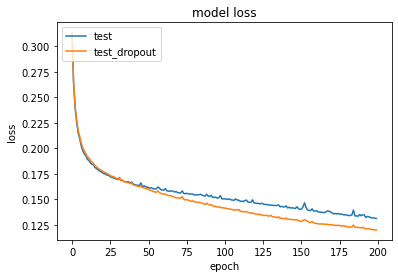

In [ ]:
# summarize history for loss
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'test_dropout'], loc='upper left')
plt.show()

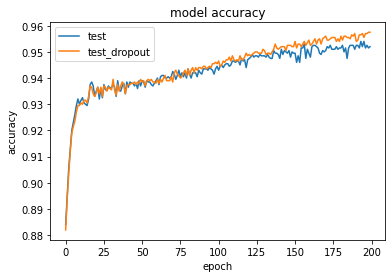

In [ ]:
# summarize history for loss
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'test_dropout'], loc='upper left')
plt.show()

# Validation Set (The CORRECT way of training and evaluation process)

In [ ]:
#cross validation example
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=1, shuffle=True)

kfold = KFold(5, True, 2) # number of folds, shuffle, seed

# enumerate splits
for train, val in kfold.split(x_train_binary):
	print('train: %s, val: %s' % (train, val))

train: [    0     1     3 ... 11997 11998 11999], val: [    2     4    10 ... 11991 11992 11994]
train: [    0     1     2 ... 11997 11998 11999], val: [    3     5     6 ... 11988 11989 11993]
train: [    1     2     3 ... 11994 11995 11996], val: [    0    13    19 ... 11997 11998 11999]
train: [    0     1     2 ... 11997 11998 11999], val: [    7     9    21 ... 11948 11952 11955]
train: [    0     2     3 ... 11997 11998 11999], val: [    1    12    14 ... 11985 11995 11996]


In [ ]:
X_train_binary = x_train_binary[train]
Y_train_binary = y_train_binary[train]
X_val_binary = x_train_binary[val]
Y_val_binary = y_train_binary[val]

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint #save the model version that achieved lower loss!

seed = 2
tf.random.set_seed(seed)
np.random.seed(seed)

model = Sequential()
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))

batch_size = 128
epochs = 200

# save best model version
save_model = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=2)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history_3 = model.fit(X_train_binary, Y_train_binary, batch_size=batch_size, epochs=epochs, callbacks=[save_model],
          validation_data=(X_val_binary, Y_val_binary))

Epoch 1/200
75/75 [==============================] - 1s 6ms/step - loss: 0.3040 - accuracy: 0.8679 - val_loss: 0.1889 - val_accuracy: 0.9250

Epoch 00001: val_loss improved from inf to 0.18887, saving model to best_model.h5
Epoch 2/200
75/75 [==============================] - 0s 4ms/step - loss: 0.1746 - accuracy: 0.9282 - val_loss: 0.1643 - val_accuracy: 0.9383

Epoch 00002: val_loss improved from 0.18887 to 0.16427, saving model to best_model.h5
Epoch 3/200
75/75 [==============================] - 0s 4ms/step - loss: 0.1543 - accuracy: 0.9432 - val_loss: 0.1463 - val_accuracy: 0.9425

Epoch 00003: val_loss improved from 0.16427 to 0.14632, saving model to best_model.h5
Epoch 4/200
75/75 [==============================] - 0s 4ms/step - loss: 0.1309 - accuracy: 0.9533 - val_loss: 0.1380 - val_accuracy: 0.9467

Epoch 00004: val_loss improved from 0.14632 to 0.13803, saving model to best_model.h5
Epoch 5/200
75/75 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 

In [ ]:
np.mean(np.round(history_3.model.predict(x_test_binary))==y_test_binary.reshape(-1,1))

0.9615

In [ ]:
# load best val model to compute test accuracy
history_3.model.load_weights('best_model.h5')
np.mean(np.round(history_3.model.predict(x_test_binary))==y_test_binary.reshape(-1,1))

0.963